In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np
import seaborn
import random
import datetime
import time
import json
import os

from marvel_keys import apikey, privateKey, marvel_char_list

In [2]:
csv_path = os.path.join('marvel_data.csv')

marvel_df = pd.read_csv(csv_path)

In [8]:
marvel_df_loop = marvel_df['name'][:2800]

In [4]:
loop_test = ['Iron Man', 'Captain America', 'Thor', 'Black Widow', 'Hulk']

## API Request and Data Retrieval

In [5]:
import hashlib
import urllib.parse
import urllib.request

In [1]:
url = 'https://gateway.marvel.com:443/v1/public/characters'

ts = str(round(time.time()))

hsh = hashlib.md5(bytes(ts+privateKey+apikey, 'utf-8')).hexdigest()

NameError: name 'time' is not defined

In [10]:
url = 'https://gateway.marvel.com:443/v1/public/characters'


#Initialize python dict containing data

marvel_data = []

for hero in marvel_df_loop:
    
    search_data = {'id':[],
                'name':[],
               'description':[],
                'comics_avail':[],
                'comics_list':[],
                'series_avail':[],
                'series_list':[],
                'events_avail':[],
                'events_list':[]}
    
    #Set parameters for search
    params = {'ts': ts,
            'apikey': apikey,
              'hash': hsh,
             'name': hero,
             'limit': '100'}
    
    #Set up response request
    response = req.get(url, params=params).json()
    
    try:

        #Extract data initial data
        hero_data = response['data']['results'][0]
        search_data['id'].append(hero_data['id'])
        search_data['name'].append(hero_data['name'])
        search_data['description'].append(hero_data['description'])
        search_data['comics_avail'].append(hero_data['comics']['available'])
        search_data['series_avail'].append(hero_data['series']['available'])
        search_data['events_avail'].append(hero_data['events']['available'])

        #Set length of comics, series, and events to iterate over
        comics_length = len(hero_data['comics']['items'])
        series_length = len(hero_data['series']['items'])
        events_length = len(hero_data['events']['items'])

        #Iterate through items of comics, series and events to obtain names
        for n in range(comics_length):
            comics_list = hero_data['comics']['items'][n]
            search_data['comics_list'].append(comics_list['name'])

        for n in range(series_length):
            series_list = hero_data['series']['items'][n]
            search_data['series_list'].append(series_list['name'])

        for n in range(events_length):
            events_list = hero_data['series']['items'][n]
            search_data['events_list'].append(events_list['name'])
            
        marvel_data.append(search_data.copy())
        
    except IndexError:
        print(f'Having Error with {hero}')

Having Error with Benjamin Grimm 
Having Error with Reed Richards 
Having Error with Scott Summers 
Having Error with Jonathan Storm 
Having Error with Henry McCoy 
Having Error with Susan Storm 
Having Error with Namor McKenzie 
Having Error with Ororo Munroe 
Having Error with Clinton Barton 
Having Error with John Jonah Jameson 
Having Error with Robert Drake 
Having Error with Henry Pym 
Having Error with Piotr Rasputin 
Having Error with Wanda Maximoff 
Having Error with Nicholas Fury 
Having Error with Janet van Dyne 
Having Error with Natalia Romanova 
Having Error with Kurt Wagner 
Having Error with May Reilly 
Having Error with Katherine Pryde 
Having Error with Jennifer Walters 
Having Error with Conan 
Having Error with Joseph Robertson 
Having Error with Pietro Maximoff 
Having Error with Max Eisenhardt 
Having Error with Elizabeth Braddock 
Having Error with Eugene Thompson 
Having Error with Simon Williams 
Having Error with Samuel Guthrie 
Having Error with Remy LeBeau 


Having Error with Katherine Bishop 
Having Error with Jason Wyngarde 
Having Error with Walter Newell 
Having Error with Joanna Cargill 
Having Error with Parker Robbins 
Having Error with Georges Batroc 
Having Error with Wyatt Wingfoot 
Having Error with Henry Camp 
Having Error with William Kaplan 
Having Error with George Stacy 
Having Error with Mari 
Having Error with Todd Arliss 
Having Error with Heinrich Zemo 
Having Error with Emil Blonsky 
Having Error with Arcturus Rann 
Having Error with James Woo 
Having Error with Frank Drake 
Having Error with Dorma 
Having Error with Lonnie Lincoln 
Having Error with David Alleyne 
Having Error with Charlie Cluster-7 
Having Error with Samuel Sawyer 
Having Error with Jacques Duquesne 
Having Error with Mary Walker 
Having Error with Miguel Santos 
Having Error with Christopher Summers 
Having Error with Morris Bench 
Having Error with David Cannon 
Having Error with Prosh 
Having Error with Roderick Kingsley 
Having Error with Dominik

Having Error with Gilgamesh 
Having Error with Rebecca Blake 
Having Error with Biotron 
Having Error with Ruth Bat-Seraph 
Having Error with Sofia Mantega 
Having Error with Nezhno Abidemi 
Having Error with Thomas Shepherd 
Having Error with Ken Mack 
Having Error with Turg 
Having Error with Ivan Petrovitch 
Having Error with Robert Diamond 
Having Error with Cassandra Webb 
Having Error with Claudette and Nicole St. Croix 
Having Error with Greg Willis 
Having Error with Korr 
Having Error with Daniel Brito 
Having Error with Jackson Brice 
Having Error with Quincy Harker 
Having Error with Duvid Fortunov 
Having Error with Philippa Sontag 
Having Error with Laurie Tromette 
Having Error with Max Modell 
Having Error with Arthur Pendragon 
Having Error with Hera Argeia 
Having Error with Johann Fennhoff 
Having Error with Martha Robertson 
Having Error with James Braddock Jr. 
Having Error with Ayesha 
Having Error with Vil 
Having Error with Eliot Franklin 
Having Error with Human

Having Error with Phoebus Apollo 
Having Error with Leopold Stryke 
Having Error with Raymond Bloch 
Having Error with Mendel Stromm 
Having Error with Recorder 211 
Having Error with Yon-Rogg 
Having Error with Barbarus 
Having Error with Zarathos 
Having Error with Araki 
Having Error with Munin 
Having Error with Sybil Dvorak 
Having Error with Daniel Leighton 
Having Error with Johnathon Ohnn 
Having Error with Andrew Chord 
Having Error with Julius Mullarkey 
Having Error with Kiskillilla 
Having Error with Sarah Ryall 
Having Error with Shevaun Haldane 
Having Error with Steven Harmon 
Having Error with Scrier 
Having Error with James Santini 
Having Error with Janice Yanizeski 
Having Error with Paul Stacy 
Having Error with Abigail Boylen 
Having Error with Sajani Jaffrey 
Having Error with Benjamin Deeds 
Having Error with Richard Parker 
Having Error with Steel Serpent 
Having Error with Jacob Conover 
Having Error with Miss Locke 
Having Error with Kaina 
Having Error with A

Having Error with Peter van Zante 
Having Error with Slaymaster 
Having Error with Yuriko Takiguchi 
Having Error with Philip Chang 
Having Error with Steve Hopkins 
Having Error with Seth Voelker 
Having Error with Sikorsky 
Having Error with Cloud 
Having Error with Mortimer 
Having Error with Jonathan Garrett 
Having Error with Duc No Tranh 
Having Error with Charles Little Sky 
Having Error with Jeff Wilde 
Having Error with Margarita Ruiz 
Having Error with Michael McCain 
Having Error with Fatale 
Having Error with Marius St. Croix 
Having Error with Angelina Brancale 
Having Error with Delilah 
Having Error with William Walters 
Having Error with Jared Corbo 
Having Error with Vincent Gonzales 
Having Error with Mar\u00eda Aracely Penalba 
Having Error with Isabel Kane 
Having Error with Bruce Dickson 
Having Error with Myraddin of Ruta 
Having Error with Tex Taylor 
Having Error with Adolf Hitler 
Having Error with Miklho 
Having Error with Ymir 
Having Error with Zelda Kurtzbe

Having Error with Katherine Waynesboro 
Having Error with Black Fox 
Having Error with Sheoke Sanada 
Having Error with Terminus 
Having Error with Martin Fletcher 
Having Error with Andrea Sterman 
Having Error with Achilles 
Having Error with Jeremy Stevens 
Having Error with Misha Bushida 
Having Error with Stacy Arnheim 
Having Error with Garabed Bashur 
Having Error with Suvik Senyaka 
Having Error with Desiree Winthrop 
Having Error with Arlette Truffaut 
Having Error with Carter Ghazikhanian 
Having Error with Vincent Stewart 
Having Error with Adriana Soria 
Having Error with Augustus Pugliese 
Having Error with Maya Hansen 
Having Error with Axeman Bone 
Having Error with Yuri Watanabe 
Having Error with Ikol 
Having Error with Kenji Uedo 
Having Error with Elizabeth Barstow 
Having Error with Lorna 
Having Error with Mikki 
Having Error with Dorrek VII 
Having Error with Frederick Duncan 
Having Error with Thomas Gideon 
Having Error with Jormungand 
Having Error with Roy Sto

Having Error with Walter Destine 
Having Error with Rina Patel 
Having Error with Rebecca Barnes 
Having Error with Montgomery Burns 
Having Error with Demitrius Collins 
Having Error with Cassandra Nova Xavier 
Having Error with Thialfi 
Having Error with Frank Dean 
Having Error with Shortpack 
Having Error with Kyle Jinadu 
Having Error with Manuel Enduque 
Having Error with Nightmask 
Having Error with Jack Castle 
Having Error with Philo Zogolowski 
Having Error with Elton Morrow 
Having Error with Cloud 
Having Error with Hoot Temple 
Having Error with Thunder 
Having Error with Gregor Shapanka 
Having Error with Roscoe Sweeney 
Having Error with Urd 
Having Error with Jurgen Hauptmann 
Having Error with Karl Kaufman 
Having Error with Madeline Bass 
Having Error with Edward March 
Having Error with Reed Richards 
Having Error with Georges Baptiste 
Having Error with Nebulon 
Having Error with Terrance Sorenson 
Having Error with Andr\u00e9 Gerard 
Having Error with Lunatik 
Havi

Having Error with Janice Lincoln 
Having Error with Walter Macken 
Having Error with Maximilian Frankenstein 
Having Error with Lucky 
Having Error with Ex Nihilo 
Having Error with Scott Adsit 
Having Error with Leila Davis 
Having Error with Earl Everett 
Having Error with Valkin 
Having Error with Peter Noble 
Having Error with Pepper Burns 
Having Error with Mary Mitchell 
Having Error with Emilio Diaz 
Having Error with Red Hawk 
Having Error with Thunder 
Having Error with Lightning 
Having Error with Elendil 
Having Error with Skuld 
Having Error with Edna Andrews 
Having Error with Francois Le Blanc 
Having Error with Humanoids 
Having Error with Lucifer 
Having Error with Maa-Gor 
Having Error with Dredmund Cromwell 
Having Error with Volla 
Having Error with Raniero Drago 
Having Error with Angelo Baldini 
Having Error with Eric Gruning 
Having Error with Gor-Tok 
Having Error with Ivan Krushki 
Having Error with Lemuel Dorcas 
Having Error with Torgo 
Having Error with Noah 

Having Error with Naga 
Having Error with Tanya Anderssen 
Having Error with Joshua Link 
Having Error with Jason Grey 
Having Error with Jason Kimball 
Having Error with Lou-Ann Savannah 
Having Error with Thog 
Having Error with Thomas J. Roberts 
Having Error with Drake Shannon 
Having Error with Silas King 
Having Error with Thomas Stuart 
Having Error with Desmond Pitt 
Having Error with Lawrence Chesney 
Having Error with Manphibian 
Having Error with Abraham Klein 
Having Error with Harrison Thompson 
Having Error with Charles Delazny Jr. 
Having Error with Impulse 
Having Error with Robert Bruce Banner 
Having Error with Tefral 
Having Error with Carina Walters 
Having Error with Don Thomas 
Having Error with Josie 
Having Error with Phillip Prometheus 
Having Error with Yi Yang 
Having Error with Arthur Dearborn 
Having Error with Marx 
Having Error with Craig Sinclair 
Having Error with Demon Bear 
Having Error with Tick Tock 
Having Error with Dragon of the Moon 
Having Erro

Having Error with Yuri Topolov 
Having Error with Anton Vanko 
Having Error with Don Hertz 
Having Error with Dreamstalker 
Having Error with Mister Davis 
Having Error with Nathan Dolly 
Having Error with Orini 
Having Error with Anelle 
Having Error with Joseph Smith 
Having Error with Keeper of the Flame 
Having Error with Rigellian Grand Commissioner 
Having Error with Clay Riley 
Having Error with Daniel Damian 
Having Error with Brother Royal 
Having Error with Joseph Stalin 
Having Error with Joost van Straaten 
Having Error with Josh Kittling 
Having Error with Mordecai Midas 
Having Error with Piper 
Having Error with Barbara Denton 
Having Error with Frank Oliver 
Having Error with Jason Roland 
Having Error with Brian Muldoon 
Having Error with Damon Dran 
Having Error with William Harper Littlejohn 
Having Error with Ramrod 
Having Error with Fera 
Having Error with Hellfire 
Having Error with Lee Wing 
Having Error with Brynocki 
Having Error with Mitchell Tanner 
Having E

In [11]:
len(marvel_data)

268

In [12]:
marvel_df = pd.DataFrame.from_dict(marvel_data)

In [13]:
#Removing Brackets

marvel_df['comics_avail'] = marvel_df['comics_avail'].str.get(0)
# marvel_df['comics_list'] = marvel_df['comics_list'].str.get(0)
marvel_df['description'] = marvel_df['description'].str.get(0)
marvel_df['events_avail'] = marvel_df['events_avail'].str.get(0)
# marvel_df['events_list'] = marvel_df['events_list'].str.get(0)
marvel_df['id'] = marvel_df['id'].str.get(0)
marvel_df['name'] = marvel_df['name'].str.get(0)
marvel_df['series_avail'] = marvel_df['series_avail'].str.get(0)
# marvel_df['series_list'] = marvel_df['series_list'].str.get(0)

In [14]:
marvel_df.iloc[0]['comics_list']

['Avengers: The Initiative (2007) #14',
 'Avengers: The Initiative (2007) #14 (SPOTLIGHT VARIANT)',
 'Avengers: The Initiative (2007) #15',
 'Avengers: The Initiative (2007) #16',
 'Avengers: The Initiative (2007) #17',
 'Avengers: The Initiative (2007) #18',
 'Avengers: The Initiative (2007) #18 (ZOMBIE VARIANT)',
 'Avengers: The Initiative (2007) #19',
 'Deadpool (1997) #44',
 'Marvel Premiere (1972) #35',
 'Marvel Premiere (1972) #36',
 'Marvel Premiere (1972) #37']

In [92]:
marvel_clean_df = marvel_df.loc[marvel_df['events_avail'] != 0]

In [93]:
marvel_clean_df

,comics_avail,comics_list,description,events_avail,events_list,id,name,series_avail,series_list
0,12,"[Avengers: The Initiative (2007) #14, Avengers...",,1,[Avengers: The Initiative (2007 - 2010)],1011334,3-D Man,3,"[Avengers: The Initiative (2007 - 2010), Deadp..."
3,68,"[A+X (2012) #8, Avengers (1963) #183, Avengers...",,4,"[A+X (2012 - Present), Avengers (1963 - 1996),...",1009148,Absorbing Man,41,"[A+X (2012 - Present), Avengers (1963 - 1996),..."
4,8,"[Uncanny X-Men (1963) #402, Uncanny X-Men (196...",,1,[Uncanny X-Men (1963 - 2011)],1009149,Abyss,3,"[Uncanny X-Men (1963 - 2011), X-Men: Alpha (19..."
6,136,[All-New Guardians of the Galaxy Vol. 3: Infin...,Adam Warlock is an artificially created human ...,9,[All-New Guardians of the Galaxy Vol. 3: Infin...,1010354,Adam Warlock,65,[All-New Guardians of the Galaxy Vol. 3: Infin...
9,32,"[Agents of Atlas (2009) #1, Agents of Atlas (2...",,1,[Agents of Atlas (2009)],1011198,Agents of Atlas,5,"[Agents of Atlas (2009), Agents of Atlas (2006..."
22,41,"[Fantastic Four (1961) #163, Fantastic Four (1...",,2,"[Fantastic Four (1961 - 1998), Fantastic Four ...",1009435,Alicia Masters,11,"[Fantastic Four (1961 - 1998), Fantastic Four ..."
23,193,"[Alpha Flight (2011) #0.1, Alpha Flight (1983)...",,5,"[Alpha Flight (1983 - 1994), Alpha Flight (200...",1010370,Alpha Flight,31,"[Alpha Flight (1983 - 1994), Alpha Flight (200..."
25,89,"[Avengers (2016) #674, Champions (2016) #1, Ch...",,4,"[Avengers (2016 - Present), Champions (2016 - ...",1011227,Amadeus Cho,25,"[Avengers (2016 - Present), Champions (2016 - ..."
28,12,"[Elektra (1996) #15, Uncanny X-Men (1963) #181...",,1,[Elektra (1996 - 1998)],1009151,Amiko,3,"[Elektra (1996 - 1998), Uncanny X-Men (1963 - ..."
31,25,[Doctor Strange and the Sorcerers Supreme Vol....,,3,[Doctor Strange and the Sorcerers Supreme Vol....,1009152,Ancient One,8,[Doctor Strange and the Sorcerers Supreme Vol....


In [94]:
#Remove brackets and quotations
marvel_clean_df['series_list'] = marvel_clean_df['series_list'].map(lambda x: str(x))
marvel_clean_df['series_list'] = marvel_clean_df['series_list'].map(lambda x: x.strip('[]'))
# marvel_clean_df['series_list'] = marvel_clean_df['series_list'].map(lambda x: x.strip("''"))

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
#Remove brackets and quotations
marvel_clean_df['comics_list'] = marvel_clean_df['comics_list'].map(lambda x: str(x))
marvel_clean_df['comics_list'] = marvel_clean_df['comics_list'].map(lambda x: x.strip('[]'))
# marvel_clean_df['comics_list'] = marvel_clean_df['comics_list'].map(lambda x: x.strip("''"))

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
#Remove brackets and quotations
marvel_clean_df['events_list'] = marvel_clean_df['events_list'].map(lambda x: str(x))
marvel_clean_df['events_list'] = marvel_clean_df['events_list'].map(lambda x: x.strip('[]'))
# marvel_clean_df['events_list'] = marvel_clean_df['events_list'].map(lambda x: x.strip("''"))

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
marvel_clean_df.head()

,comics_avail,comics_list,description,events_avail,events_list,id,name,series_avail,series_list
0,12,"'Avengers: The Initiative (2007) #14', 'Avenge...",,1,'Avengers: The Initiative (2007 - 2010)',1011334,3-D Man,3,"'Avengers: The Initiative (2007 - 2010)', 'Dea..."
3,68,"'A+X (2012) #8', 'Avengers (1963) #183', 'Aven...",,4,"'A+X (2012 - Present)', 'Avengers (1963 - 1996...",1009148,Absorbing Man,41,"'A+X (2012 - Present)', 'Avengers (1963 - 1996..."
4,8,"'Uncanny X-Men (1963) #402', 'Uncanny X-Men (1...",,1,'Uncanny X-Men (1963 - 2011)',1009149,Abyss,3,"'Uncanny X-Men (1963 - 2011)', 'X-Men: Alpha (..."
6,136,'All-New Guardians of the Galaxy Vol. 3: Infin...,Adam Warlock is an artificially created human ...,9,'All-New Guardians of the Galaxy Vol. 3: Infin...,1010354,Adam Warlock,65,'All-New Guardians of the Galaxy Vol. 3: Infin...
9,32,"'Agents of Atlas (2009) #1', 'Agents of Atlas ...",,1,'Agents of Atlas (2009)',1011198,Agents of Atlas,5,"'Agents of Atlas (2009)', 'Agents of Atlas (20..."


In [98]:
marvel_clean_df['Combined'] = marvel_clean_df[['comics_list', 'events_list', 'series_list']].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
                                                                                                                           
                                                                                                                           
                                                                                                                                            

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
marvel_clean_df['Combined']

0       'Avengers: The Initiative (2007) #14', 'Avenge...
3       'A+X (2012) #8', 'Avengers (1963) #183', 'Aven...
4       'Uncanny X-Men (1963) #402', 'Uncanny X-Men (1...
6       'All-New Guardians of the Galaxy Vol. 3: Infin...
9       'Agents of Atlas (2009) #1', 'Agents of Atlas ...
22      'Fantastic Four (1961) #163', 'Fantastic Four ...
23      'Alpha Flight (2011) #0.1', 'Alpha Flight (198...
25      'Avengers (2016) #674', 'Champions (2016) #1',...
28      'Elektra (1996) #15', 'Uncanny X-Men (1963) #1...
31      'Doctor Strange and the Sorcerers Supreme Vol....
34      'All-New, All-Different Avengers (2015) #11', ...
37      'Avengers (2010) #2', 'Avengers (2010) #3', 'A...
39      'Amazing Spider-Man (1999) #5', 'Amazing Spide...
40      'Age of X: Alpha (2010) #1', 'Age of X: Alpha ...
42      'Age of Apocalypse: The Chosen (1995) #1', 'Al...
43      'Uncanny X-Men (1963) #210', 'Uncanny X-Men (1...
44      'Adam: Legend of the Blue Marvel (Trade Paperb...
47      'Aveng

In [20]:
# marvel_desc = marvel_df[['name', 'description']]

In [21]:
# #Removing Brackets
# marvel_desc['name'] = marvel_desc['name'].str.get(0)
# marvel_desc['description'] = marvel_desc['description'].str.get(0)

## Adapted from brandonrose.org

In [109]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
import re
import os
import codecs
from sklearn import feature_extraction

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mgarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
print(type(str(marvel_data[0]['description']).strip('[]')))

<class 'str'>


In [102]:
# vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
# print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

### Tokenizing Using PySpark and Adapation from brandonrose.org

In [111]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover

In [112]:
# create spark app and session
spark = SparkSession.builder.appName('nlp').getOrCreate()

Py4JJavaError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext.
: java.net.BindException: Can't assign requested address: Service 'sparkDriver' failed after 16 retries (on a random free port)! Consider explicitly setting the appropriate binding address for the service 'sparkDriver' (for example spark.driver.bindAddress for SparkDriver) to the correct binding address.
	at sun.nio.ch.Net.bind0(Native Method)
	at sun.nio.ch.Net.bind(Net.java:433)
	at sun.nio.ch.Net.bind(Net.java:425)
	at sun.nio.ch.ServerSocketChannelImpl.bind(ServerSocketChannelImpl.java:223)
	at io.netty.channel.socket.nio.NioServerSocketChannel.doBind(NioServerSocketChannel.java:128)
	at io.netty.channel.AbstractChannel$AbstractUnsafe.bind(AbstractChannel.java:558)
	at io.netty.channel.DefaultChannelPipeline$HeadContext.bind(DefaultChannelPipeline.java:1283)
	at io.netty.channel.AbstractChannelHandlerContext.invokeBind(AbstractChannelHandlerContext.java:501)
	at io.netty.channel.AbstractChannelHandlerContext.bind(AbstractChannelHandlerContext.java:486)
	at io.netty.channel.DefaultChannelPipeline.bind(DefaultChannelPipeline.java:989)
	at io.netty.channel.AbstractChannel.bind(AbstractChannel.java:254)
	at io.netty.bootstrap.AbstractBootstrap$2.run(AbstractBootstrap.java:364)
	at io.netty.util.concurrent.AbstractEventExecutor.safeExecute(AbstractEventExecutor.java:163)
	at io.netty.util.concurrent.SingleThreadEventExecutor.runAllTasks(SingleThreadEventExecutor.java:403)
	at io.netty.channel.nio.NioEventLoop.run(NioEventLoop.java:463)
	at io.netty.util.concurrent.SingleThreadEventExecutor$5.run(SingleThreadEventExecutor.java:858)
	at io.netty.util.concurrent.DefaultThreadFactory$DefaultRunnableDecorator.run(DefaultThreadFactory.java:138)
	at java.lang.Thread.run(Thread.java:748)


In [106]:
marvel_spark = spark.createDataFrame(marvel_clean_df)

AttributeError: 'NoneType' object has no attribute 'sc'

In [72]:
marvel_spark.show()

+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+--------------------+
|comics_avail|         comics_list|         description|events_avail|         events_list|     id|           name|series_avail|         series_list|            Combined|
+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+--------------------+
|          12|Avengers: The Ini...|                    |           1|Avengers: The Ini...|1011334|        3-D Man|           3|Avengers: The Ini...|Avengers: The Ini...|
|          68|A+X (2012) #8', '...|                    |           4|A+X (2012 - Prese...|1009148|  Absorbing Man|          41|A+X (2012 - Prese...|A+X (2012) #8', '...|
|           8|Uncanny X-Men (19...|                    |           1|Uncanny X-Men (19...|1009149|          Abyss|           3|Uncanny X-Men (19...|Un

In [73]:
tokenizer = Tokenizer(inputCol="Combined", outputCol="words")

In [74]:
tokenized = tokenizer.transform(marvel_spark)

In [75]:
tokenized.show()

+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+--------------------+--------------------+
|comics_avail|         comics_list|         description|events_avail|         events_list|     id|           name|series_avail|         series_list|            Combined|               words|
+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+--------------------+--------------------+
|          12|Avengers: The Ini...|                    |           1|Avengers: The Ini...|1011334|        3-D Man|           3|Avengers: The Ini...|Avengers: The Ini...|[avengers:, the, ...|
|          68|A+X (2012) #8', '...|                    |           4|A+X (2012 - Prese...|1009148|  Absorbing Man|          41|A+X (2012 - Prese...|A+X (2012) #8', '...|[a+x, (2012), #8'...|
|           8|Uncanny X-Men (19...|          

In [76]:
# instantiate remover
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

In [77]:
# Transform dataframe
tokenized_filt = remover.transform(tokenized)

In [78]:
tokenized_filt.show()

+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+--------------------+--------------------+--------------------+
|comics_avail|         comics_list|         description|events_avail|         events_list|     id|           name|series_avail|         series_list|            Combined|               words|            filtered|
+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+--------------------+--------------------+--------------------+
|          12|Avengers: The Ini...|                    |           1|Avengers: The Ini...|1011334|        3-D Man|           3|Avengers: The Ini...|Avengers: The Ini...|[avengers:, the, ...|[avengers:, initi...|
|          68|A+X (2012) #8', '...|                    |           4|A+X (2012 - Prese...|1009148|  Absorbing Man|          41|A+X (2012 - Prese...|A+X 

In [79]:
tokenized_df = tokenized_filt.toPandas()

In [80]:
spark.stop()

In [113]:
tokenized_df.head()

,comics_avail,comics_list,description,events_avail,events_list,id,name,series_avail,series_list,Combined,words,filtered
0,12,"Avengers: The Initiative (2007) #14', 'Avenger...",,1,Avengers: The Initiative (2007 - 2010),1011334,3-D Man,3,"Avengers: The Initiative (2007 - 2010)', 'Dead...","Avengers: The Initiative (2007) #14', 'Avenger...","[avengers:, the, initiative, (2007), #14',, 'a...","[avengers:, initiative, (2007), #14',, 'avenge..."
1,68,"A+X (2012) #8', 'Avengers (1963) #183', 'Aveng...",,4,"A+X (2012 - Present)', 'Avengers (1963 - 1996)...",1009148,Absorbing Man,41,"A+X (2012 - Present)', 'Avengers (1963 - 1996)...","A+X (2012) #8', 'Avengers (1963) #183', 'Aveng...","[a+x, (2012), #8',, 'avengers, (1963), #183',,...","[a+x, (2012), #8',, 'avengers, (1963), #183',,..."
2,8,"Uncanny X-Men (1963) #402', 'Uncanny X-Men (19...",,1,Uncanny X-Men (1963 - 2011),1009149,Abyss,3,"Uncanny X-Men (1963 - 2011)', 'X-Men: Alpha (1...","Uncanny X-Men (1963) #402', 'Uncanny X-Men (19...","[uncanny, x-men, (1963), #402',, 'uncanny, x-m...","[uncanny, x-men, (1963), #402',, 'uncanny, x-m..."
3,136,All-New Guardians of the Galaxy Vol. 3: Infini...,Adam Warlock is an artificially created human ...,9,All-New Guardians of the Galaxy Vol. 3: Infini...,1010354,Adam Warlock,65,All-New Guardians of the Galaxy Vol. 3: Infini...,All-New Guardians of the Galaxy Vol. 3: Infini...,"[all-new, guardians, of, the, galaxy, vol., 3:...","[all-new, guardians, galaxy, vol., 3:, infinit..."
4,32,"Agents of Atlas (2009) #1', 'Agents of Atlas (...",,1,Agents of Atlas (2009),1011198,Agents of Atlas,5,"Agents of Atlas (2009)', 'Agents of Atlas (200...","Agents of Atlas (2009) #1', 'Agents of Atlas (...","[agents, of, atlas, (2009), #1',, 'agents, of,...","[agents, atlas, (2009), #1',, 'agents, atlas, ..."


In [2]:
#Create necessary lists for kmeans

names_list = []
all_filtered = []
all_comics = []
all_series = []
stemmed_words = []
comics_avail_list = []
events_avail_list = []
series_avail_list = []
everything_list = []

for n in range(len(tokenized_df)):
    names_list.append(tokenized_df.iloc[n]['name'])
    all_filtered.extend(tokenized_df.iloc[n]['filtered'])
    all_comics.append(tokenized_df.iloc[n]['comics_list'])
    all_series.append(tokenized_df.iloc[n]['series_list'])
    stemmed_words.extend(tokenized_df.iloc[n]['words'])
    comics_avail_list.append(tokenized_df.iloc[n]['comics_avail'])
    events_avail_list.append(tokenized_df.iloc[n]['events_avail'])
    series_avail_list.append(tokenized_df.iloc[n]['series_avail'])
    everything_list.append(tokenized_df.iloc[n]['Combined'])

NameError: name 'tokenized_df' is not defined

In [118]:
len(everything_list)==len(names_list)

True

In [119]:
everything_list

["Avengers: The Initiative (2007) #14', 'Avengers: The Initiative (2007) #14 (SPOTLIGHT VARIANT)', 'Avengers: The Initiative (2007) #15', 'Avengers: The Initiative (2007) #16', 'Avengers: The Initiative (2007) #17', 'Avengers: The Initiative (2007) #18', 'Avengers: The Initiative (2007) #18 (ZOMBIE VARIANT)', 'Avengers: The Initiative (2007) #19', 'Deadpool (1997) #44', 'Marvel Premiere (1972) #35', 'Marvel Premiere (1972) #36', 'Marvel Premiere (1972) #37,Avengers: The Initiative (2007 - 2010),Avengers: The Initiative (2007 - 2010)', 'Deadpool (1997 - 2002)', 'Marvel Premiere (1972 - 1981)",
 "A+X (2012) #8', 'Avengers (1963) #183', 'Avengers (1963) #184', 'Avengers (1963) #270', 'Avengers Academy (2010) #16', 'Avengers Academy (2010) #17', 'Avengers Academy (2010) #18', 'Avengers Academy (2010) #19', 'Avengers Annual (1967) #20', 'Black Bolt (2017) #3', 'Black Bolt (2017) #4', 'Black Bolt (2017) #11', 'Black Bolt Vol. 1: Hard Time (Trade Paperback)', 'Captain America (1998) #24', 'Da

In [120]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [121]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [359]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(all_series) #fit the vectorizer to descriptions

print(tfidf_matrix.shape)

(501, 16)


In [360]:
terms = tfidf_vectorizer.get_feature_names()

In [361]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

<function print>

In [382]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 244 ms, sys: 2.7 ms, total: 246 ms
Wall time: 245 ms


In [383]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [384]:
heroes = {'heroes': names_list, 'comics_available': comics_avail_list,
          'events_available': events_avail_list, 'series_available': series_avail_list,
          'comics+series+events': everything_list, 'cluster': clusters,}

frame = pd.DataFrame(heroes, index = [clusters] , columns = ['heroes', 
                                                             'comics_available', 'events_available',
                                                             'series_available','cluster', 'comics+series+events'])

In [385]:
frame.head()

,heroes,comics_available,events_available,series_available,cluster,comics+series+events
3,3-D Man,12,1,3,3,"Avengers: The Initiative (2007) #14', 'Avenger..."
3,Absorbing Man,68,4,41,3,"A+X (2012) #8', 'Avengers (1963) #183', 'Aveng..."
4,Abyss,8,1,3,4,"Uncanny X-Men (1963) #402', 'Uncanny X-Men (19..."
0,Adam Warlock,136,9,65,0,All-New Guardians of the Galaxy Vol. 3: Infini...
3,Agents of Atlas,32,1,5,3,"Agents of Atlas (2009) #1', 'Agents of Atlas (..."


In [386]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

4    135
3    111
0    107
1     75
2     73
Name: cluster, dtype: int64

In [387]:
# grouped = frame['rank'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

# grouped.mean() #average rank (1 to 100) per cluster

In [388]:
# vocab_frame = pd.DataFrame({'words': all_filtered}, index = stemmed_words)
# print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

In [389]:
# from __future__ import print_function

# print("Top terms per cluster:")
# print()
# #sort cluster centers by proximity to centroid
# order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

# for i in range(num_clusters):
#     print("Cluster %d words:" % i, end='')
    
#     for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
#         print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
#     print() #add whitespace
#     print() #add whitespace
    
#     print("Cluster %d titles:" % i, end='')
#     for title in frame.ix[i]['title'].values.tolist():
#         print(' %s,' % title, end='')
#     print() #add whitespace
#     print() #add whitespace
    
# print()
# print()

In [390]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

## KMeans Testing

In [391]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(pos)
predicted_clusters = kmeans.predict(pos)

In [392]:
import matplotlib.pyplot as plt
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size


Current size: [6.0, 4.0]


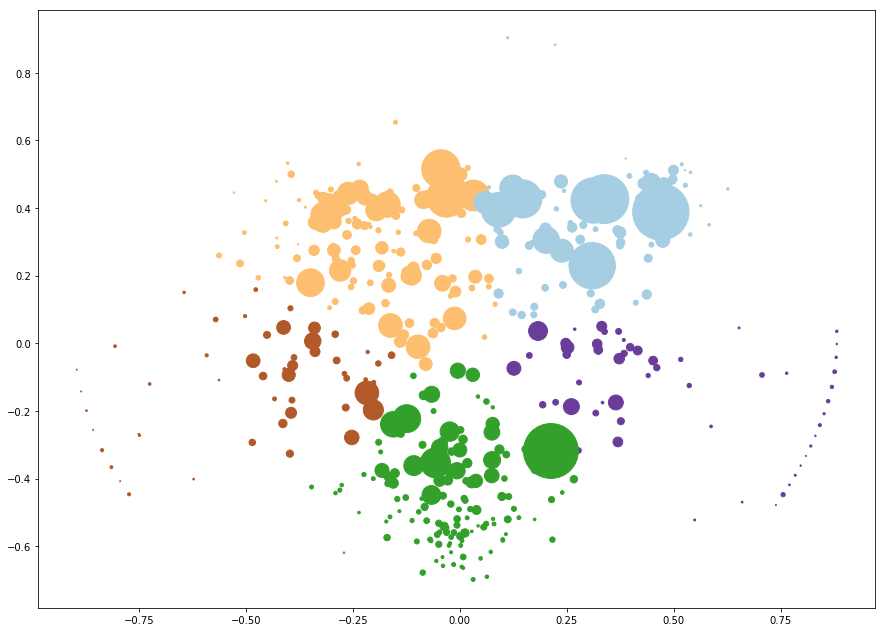

In [393]:
plt.scatter(pos[:, 0], pos[:, 1], 
            c=predicted_clusters, s=df['size'], 
            cmap='Paired')

## Setting up Cluster Chart demonstrated by brandonrose.org

In [394]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#FCB230', 4:'#30BBFC', 5:'#3058FC', 6:'#FC30F3',
                 7: '#9BE3E5'}

#set up cluster names using a dict
cluster_names = {0: 'One', 
                 1: 'Two', 
                 2: 'Three',
                3: 'Four',
                4: 'Five',
                5: 'Six',
                6: 'Seven',
                7: 'Eight'}

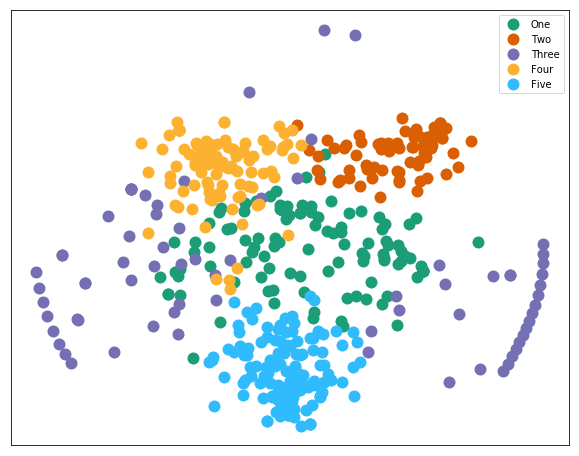

In [395]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=names_list)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(10, 8)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
# for i in range(len(df)):
#     ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [396]:
plt.close()

In [397]:
import mpld3

In [398]:

#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [399]:
#create data frame that has the result of the MDS plus the cluster numbers and heroes
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, heroes=names_list)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.heroes]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

In [412]:
df.head()

,heroes,label,x,y,size
0,3-D Man,3,-0.236502,0.530285,12
1,Absorbing Man,3,-0.138378,0.269717,68
2,Abyss,4,-0.014587,-0.653901,8
3,Adam Warlock,0,-0.212658,0.102469,136
4,Agents of Atlas,3,-0.394451,0.499754,32


In [413]:
df_wo_outliers = df.loc[df['label'] != 2]

In [414]:
df_wo_outliers.head()

,heroes,label,x,y,size
0,3-D Man,3,-0.236502,0.530285,12
1,Absorbing Man,3,-0.138378,0.269717,68
2,Abyss,4,-0.014587,-0.653901,8
3,Adam Warlock,0,-0.212658,0.102469,136
4,Agents of Atlas,3,-0.394451,0.499754,32


In [411]:
df['size'] = list(frame.comics_available)

In [415]:
df_wo_outliers.to_csv('marvel_cluster_no_OL.csv', index=False)

In [408]:
len(df.loc[df['label'] == 2])

73